In [57]:
#调库 析晶程序判别
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [58]:
#定义距离函数
def cal_distance(x1,y1,z1,x2,y2,z2):
    dis = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(1/2)
    return dis

In [59]:
########参数列表#############
max_neigh = 6
max_dis = 6.0


In [60]:
#读取文本函数，返回直接d选帧
def get_data(path,frame_num):
    with open(path) as f:
        str_data = f.read()
    data = str_data.split()
    ###选帧#########
    #此处写个程序选帧
    atoms_num = int(data[0])
    frame_len = atoms_num*4+2
    data_len =len(data)
    max_frame = data_len // frame_len
    
    temp = []
    temp = data[frame_len*frame_num:frame_len*(frame_num+1)]

    #暂时先自行处理了表头
    temp = temp[2:]
    frame_list = []
    for i in range(atoms_num):
        frame_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])
    
    return frame_list

In [61]:
class point:
    def __init__(self,name,x,y,z):
        #自身坐标
        self.x=x
        self.y=y
        self.z=z
        self.name=name
        self.cry=0
        #记录最近的几个点 每个点按顺序记录下xyz和dis 
        self.neighbor_atom=[]
        #记录与最近的几个点的角度 
        self.angle=[]
    
    #定义类中的替换函数  如果这个距离比原有的小，就替换掉原有点的记录
    def show(self):
        print("name: ",self.name," xyz: ",self.x," ",self.y," " ,self.z)
        print("cry= ",self.cry)
#         print("neighbor: ")
#         for i in self.neighbor_atom:
#             print(i)
#         print("angle: ")
#         for i in self.angle:
#             print(i)
            
    def sub(self,x,y,z,dis,max_dis):
        
        #为空的话直接放进去
        if(len(self.neighbor_atom)==0):
            self.neighbor_atom.append([x,y,z,dis])
            return
        #大多数点是比表中最大的点距离大的 所以大的直接返回
        if(dis>max_dis):
            return
        #如果需要调整,那么先插入表尾，再排序，再删除最后一个节点就行
        else:
            self.neighbor_atom.append([x,y,z,dis])
            self.neighbor_atom.sort(key=lambda xx:xx[-1])
            #如果表满了则删除最后一个 或者最后一个大于了max dis
            if(len(self.neighbor_atom)>max_neigh or self.neighbor_atom[-1][-1]>max_dis):
                del self.neighbor_atom[-1]
    
    def filter_neighbor(self,max_dis):
        self.neighbor_atom.sort(key=lambda xx:xx[-1])
        for i in range(len(self.neighbor_atom)-1,-1,-1):
            if(self.neighbor_atom[-1][-1]>max_dis):
                self.neighbor_atom.pop()
    
    #计算以中心点为顶点，距离最近的任意两点为边的角的角度值
#     def cal_angle(self):
#         for i in range(len(self.neighbor_atom)):
#             for j in range(i+1,len(self.neighbor_atom)):
#                 #此时便有了point nei[i] nei[j]三个点
#                 #定义两个空间向量
#                 x1,y1,z1 = (self.neighbor_atom[i][0]-self.x),(self.neighbor_atom[i][1]-self.y),(self.neighbor_atom[i][2]-self.z)
#                 x2,y2,z2 = (self.neighbor_atom[j][0]-self.x),(self.neighbor_atom[j][1]-self.y),(self.neighbor_atom[j][2]-self.z)
#                 #两个向量的夹角
#                 cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2)))
#                 B = math.degrees(math.cos(cos_b)) 
#                 self.angle.append(B)
    def cal_angle(self):
        self.angle.clear()
        for i in range(len(self.neighbor_atom)):
            for j in range(i+1,len(self.neighbor_atom)):
                a = [self.neighbor_atom[i][0], self.neighbor_atom[i][1], self.neighbor_atom[i][2]]
                
                b = [self.x, self.y, self.z]
                
                c=[self.neighbor_atom[j][0], self.neighbor_atom[j][1], self.neighbor_atom[j][2]]
                
                temp = fun_angle(a,b,c)
                self.angle.append(temp)
        self.angle.sort()
    #最后还应该有一个判断是不是晶体的程序
    def judge_cry(self):
        pass

In [62]:
def classify_atom(data,atom_type):
    ans_list = []
    a_type =len(atom_type)
    for i in range(a_type):
        ans_list.append([])

    for i in data:
        for j in range(a_type):
               if(i[0]==atom_type[j]):
                    ans_list[j].append(point(i[0],i[1],i[2],i[3]))
    return ans_list 

# 主函数

In [63]:
############主函数##############

file_path = r'C:\Users\zhang\Desktop\p3000-fix.xyz'
data = get_data(file_path,349)

####获取元素分类列表
(nb_list,li_list,o_list) = classify_atom(data,['Nb','Li','O'])




In [64]:
##此处分为两种情况，一个是计算Nb-Nb之间的距离，一个是计算Nb-O之间的距离
#这里计算Nb-Nb距离
for i in range(len(nb_list)):
    for j in range(i+1,len(nb_list)):
        dis = cal_distance(nb_list[i].x, nb_list[i].y, nb_list[i].z,nb_list[j].x,nb_list[j].y,nb_list[j].z)
        #通过计算各个点的距离  如果距离小了就放入列表中
        nb_list[i].sub(nb_list[j].x, nb_list[j].y, nb_list[j].z, dis, max_dis)
        nb_list[j].sub(nb_list[i].x, nb_list[i].y, nb_list[i].z, dis, max_dis)

In [65]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@Time     : 2021/8/10 9:16
@Author   : Allen Pen(Haijun Peng)
@E-mail   : shengyutou@outlook.com
NOTE:
"""
import math


def fun_angle(point_a, point_b, point_c):
    """
    根据三点坐标计算夹角

                  点a
           点b ∠
                   点c

    :param point_a、point_b、point_c: 数据类型为list,二维坐标形式[x、y]或三维坐标形式[x、y、z]
    :return: 返回角点b的夹角值


    数学原理：
    设m,n是两个不为0的向量，它们的夹角为<m,n> (或用α ,β, θ ,..,字母表示)

    1、由向量公式：cos<m,n>=m.n/|m||n|

    2、若向量用坐标表示，m=(x1,y1,z1), n=(x2,y2,z2),

    则,m.n=(x1x2+y1y2+z1z2).

    |m|=√(x1^2+y1^2+z1^2), |n|=√(x2^2+y2^2+z2^2).

    将这些代入②得到：

    cos<m,n>=(x1x2+y1y2+z1z2)/[√(x1^2+y1^2+z1^2)*√(x2^2+y2^2+z2^2)]

    上述公式是以空间三维坐标给出的，令坐标中的z=0,则得平面向量的计算公式。

    两个向量夹角的取值范围是：[0,π].

    夹角为锐角时，cosθ>0；夹角为钝角时,cosθ<0.

    """
    a_x, b_x, c_x = point_a[0], point_b[0], point_c[0]  # 点a、b、c的x坐标
    a_y, b_y, c_y = point_a[1], point_b[1], point_c[1]  # 点a、b、c的y坐标

    if len(point_a) == len(point_b) == len(point_c) == 3:
        # print("坐标点为3维坐标形式")
        a_z, b_z, c_z = point_a[2], point_b[2], point_c[2]  # 点a、b、c的z坐标
    else:
        a_z, b_z, c_z = 0,0,0  # 坐标点为2维坐标形式，z 坐标默认值设为0
        # print("坐标点为2维坐标形式，z 坐标默认值设为0")

    # 向量 m=(x1,y1,z1), n=(x2,y2,z2)
    x1,y1,z1 = (a_x-b_x),(a_y-b_y),(a_z-b_z)
    x2,y2,z2 = (c_x-b_x),(c_y-b_y),(c_z-b_z)

    # 两个向量的夹角，即角点b的夹角余弦值
    cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2))) # 角点b的夹角余弦值
    B = math.degrees(math.acos(cos_b)) # 角点b的夹角值
    return B

In [66]:
for i in nb_list:
    i.cal_angle()

In [11]:
for i in nb_list[:3]:
    i.show()

name:  Nb  xyz:  50.342743   4.635173   33.25463
neighbor: 
[52.997643, 3.118103, 35.44163, 3.759383512612142]
[50.578743, 7.723913, 35.73713, 3.9697376534980253]
[50.641343, 1.657753, 30.64503, 3.970416096128969]
[53.101443, 6.128083, 30.73263, 4.02488384405066]
[47.322643, 2.849113, 35.40393, 4.114669467113976]
[47.480443, 6.016933, 30.51323, 4.197296266360046]
angle: 
79.32517448428688
82.46541069483754
84.73303469226049
86.33316275882082
89.05632893378439
91.52596578941115
91.72844263017738
92.25248787047603
93.13670808000776
93.58329531661734
94.18690305475798
101.11856649065267
171.9018215232915
172.4768924489969
173.930326366333
name:  Nb  xyz:  15.736243   3.532323   12.12133
neighbor: 
[13.860543, 6.559003, 11.07945, 3.7100614882775194]
[18.565943, 2.219883, 9.99868, 3.7729754658757066]
[14.367343, 3.908873, 15.75283, 3.8991626488901425]
[19.509043, 3.600583, 13.34573, 3.967093977661732]
[11.796073, 2.110063, 13.60493, 4.443965807305452]
[18.606343, 0.782188, 14.80373, 4.79541

In [67]:
#################现在把计算后得来的数据都复制好，之后再对数据处理就不要对原始数据进行更改了

copy_list_nbnb =nb_list 


In [68]:
#再来个分析NbO之间键角的列
nb_O_list  = nb_list
list_Nb_O = []
#先把O存入Nb最近的列表中
for i in nb_O_list:
    for j in o_list:
        #大于dis的直接返回 没有计算的意义
        if(abs(i.x-j.x)>max_dis or abs(i.y-j.y)>max_dis or abs(i.z-j.z)>max_dis):
            continue
        
        dis = cal_distance(i.x, i.y, i.z, j.x, j.y, j.z)
        i.sub(j.x ,j.y, j.z, dis,max_dis)
        j.sub(i.x, i.y, i.z, dis, max_dis)
#再计算最近原子的角度
for i in nb_O_list:
    i.cal_angle()

# 以下是分析程序

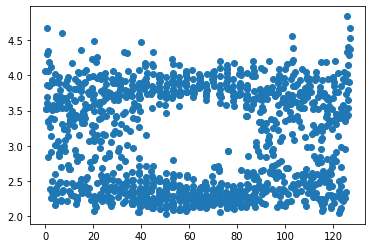

In [69]:
#这个函数观察表里的每个点的最大neigh分布
x,y = [],[]
for i in copy_list_nbnb:
    t = 0
    for j in i.neighbor_atom:
        if(j[-1]>t):
            t=j[-1]
        if(j[-1]>10):
            i.show()
    x.append(i.x)
    y.append(t)
plt.scatter(x,y)

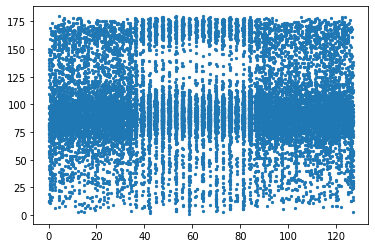

In [70]:
#此处是为了观察Nb与Nb之间的键角分布
x,y = [],[]
for i in copy_list_nbnb:
    for j in i.angle:
        y.append(j)
        x.append(i.x)
plt.scatter(x,y,s=5)

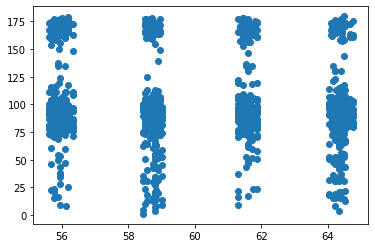

In [71]:
#此处是为了观察Nb与Nb之间的键角分布
x,y = [],[]
for i in copy_list_nbnb:
    if(55<i.x<65):
        for j in i.angle:
            y.append(j)
            x.append(i.x)
plt.scatter(x,y)


# 下面是分析Nb-O之间的键角分布的 

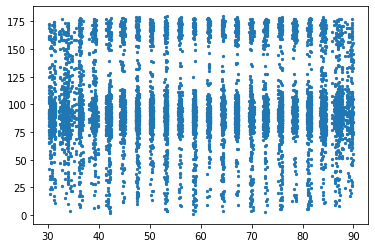

In [72]:
#此处是为了观察Nb与O之间的键角分布
x,y = [],[]
for i in nb_O_list:
    if(30<i.x<90):
        for j in i.angle:
            y.append(j)
            x.append(i.x)
plt.scatter(x,y,s=5)

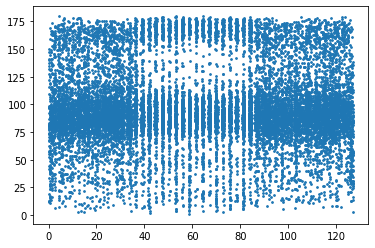

In [73]:
#此处是为了观察Nb与Nb之间的键角分布
x,y = [],[]
for i in copy_list_nbnb:
    for j in i.angle:
        y.append(j)
        x.append(i.x)
plt.scatter(x,y,s=3)

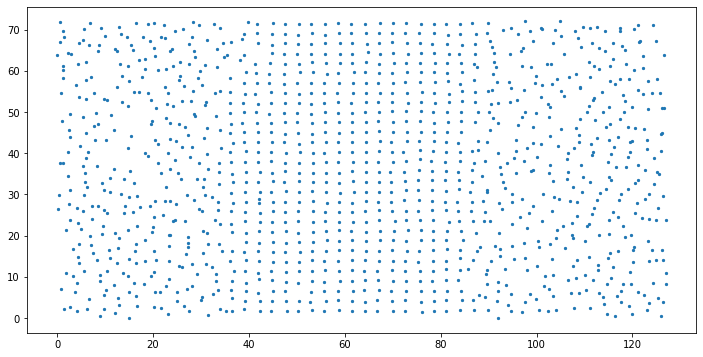

In [74]:
#此处是为了观察Nb的x分布
x,y = [],[]
for i in copy_list_nbnb:
    y.append(i.z)
    x.append(i.x)
plt.figure(figsize=(12,6))
plt.scatter(x,y,s=5)

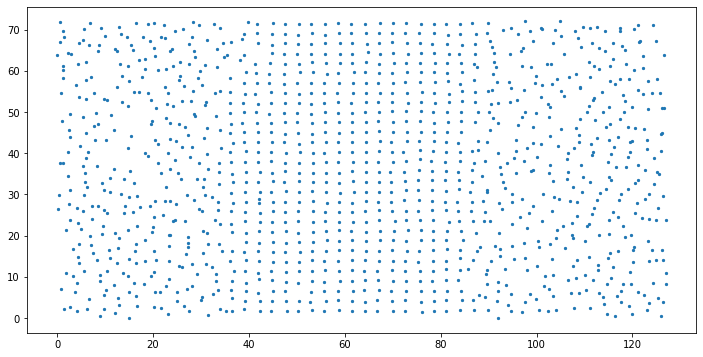

In [75]:
#除了xz方向之外，在y方向也给他分层观察下分布

# 观察了下 好像只有忽略y 仅靠xz方向来做一个平面分析cry
x,y = [],[]
for i in copy_list_nbnb:
    if(i.y>0):
        y.append(i.z)
        x.append(i.x)
plt.figure(figsize=(12,6))
plt.scatter(x,y,s=5)

In [76]:
#找出最大的xyz
maxx,maxy,maxz=0,0,0
for i in copy_list_nbnb:
    if(i.x>maxx):
        maxx=i.x
    if(i.y>maxy):
        maxy=i.y
    if(i.z>maxz):
        maxz=i.z
print(maxx,maxy,maxz)

127.012965 9.285385 71.97718


# 判断原子是否共面的方法 速度解决问题

##第一种 先由原子形成面 再判断面是否能被一定数量的原子所承认 

In [77]:
#x方向上的 参数调整
x_parallel = 0
#space为0.4就是说其上下一算  区域宽度为0.8
x_space = 0.4

step = 0.1

In [78]:
sort_with_x = copy_list_nbnb

In [79]:
sort_with_x.sort(key = lambda it:it.x)

In [80]:
for i in sort_with_x[551:650]:
    print(i.x)

56.113165
56.135565
56.182265
56.192065
56.233665
56.342465
58.439365
58.488365
58.498765
58.515565
58.535065
58.559465
58.605165
58.640065
58.640965
58.663965
58.704165
58.706665
58.726565
58.738465
58.754765
58.794965
58.809465
58.811965
58.813565
58.813865
58.814465
58.819865
58.835265
58.871165
58.893665
58.930765
58.935365
58.967665
58.967965
59.015465
61.306465
61.312065
61.362765
61.388965
61.412265
61.414465
61.417665
61.429765
61.443165
61.444065
61.456065
61.458865
61.492965
61.493265
61.545365
61.558665
61.576065
61.576865
61.580365
61.584565
61.589365
61.609165
61.656665
61.664365
61.666565
61.722365
61.754965
61.816965
61.855165
61.867365
64.041065
64.091365
64.114765
64.136565
64.163665
64.219565
64.221765
64.223665
64.231065
64.242165
64.332565
64.340265
64.343765
64.351565
64.355965
64.365565
64.377365
64.378665
64.381065
64.400065
64.405165
64.407465
64.414765
64.437365
64.472965
64.474965
64.502465
64.520365
64.662965
64.751465
66.685165
66.740565
66.809065


In [81]:
#找这样一个区域，在这个中线附近的上下0.4范围内拥有的原子他的z排列相邻

#满足这个要求的原子的dis在2.2-2.4左右  根据10A的要求 所以要
#并且这个区域相邻的上下0.6的x区域没有其他原子存在

#或者说返回这个位置上 以及 与其相关联的点 然后将判断后的点放在一个新的列表里

def is_cry(list_0):
    if(len(list_0)<4):
        return 0
    list_0.sort(key = lambda it:it.z)
    
    i = 0
    while(i<len(list_0)):
        #如果前面一个是cry
        if(list_0[i-1].cry==1 and i>0):
                if(0.3 < list_0[i].z - list_0[i-1].z <1.0):                    
                    list_0[i].cry=1
                    i+=1
        else: 
            ##如果前一个不是cry
            #前一个不是cry且到了最后三个点 直接出去
            if(i+3>len(list_0)-1):
                break

            #不是cry 而且在中间
            count=0
            for j in range(i,i+3):
                if(0.3<list_0[j].z-list_0[j+1].z<1.0):
                    count+=1 
            if(count>=2):
                list_0[i].cry=1

            #本次判断完成
            i+=1
    list_0.sort(key = lambda it:it.x)
    return list_0
    

In [82]:
i = 0

while(i<maxx-0.4):
    handle_list = []
    #j记录原子的index
    index = 0
    for j in range(len(sort_with_x)):
        if(i <= sort_with_x[j].x < i+0.8):
            #第一次赋值
            if(index==0):
                index = j
            handle_list.append(sort_with_x[j])
    
    #现在得到了待处理的原子 然后分析是否是cry
    #返回得到一个0和1的judge列表 再返回去标记原子
    list_0 = is_cry(handle_list)
    
    if(list_0!=0):
        for n in list_0:
            print(n.show())
        for m in list_0:
            sort_with_x[index].cry = m.cry
            index+=1
    #此处标记完成 然后进行下一步标记
    
    #步长
    i+=0.1

name:  Nb  xyz:  0.014025   1.632785   63.77808
cry=  0
None
name:  Nb  xyz:  0.166715   5.414655   26.52758
cry=  0
None
name:  Nb  xyz:  0.368045   4.472035   29.91648
cry=  0
None
name:  Nb  xyz:  0.589205   0.417668   37.75768
cry=  0
None
name:  Nb  xyz:  0.618935   5.515125   71.88288
cry=  0
None
name:  Nb  xyz:  0.680975   3.714565   66.95848
cry=  0
None
name:  Nb  xyz:  0.716095   5.239565   54.66238
cry=  0
None
name:  Nb  xyz:  0.166715   5.414655   26.52758
cry=  0
None
name:  Nb  xyz:  0.368045   4.472035   29.91648
cry=  0
None
name:  Nb  xyz:  0.589205   0.417668   37.75768
cry=  0
None
name:  Nb  xyz:  0.618935   5.515125   71.88288
cry=  0
None
name:  Nb  xyz:  0.680975   3.714565   66.95848
cry=  0
None
name:  Nb  xyz:  0.716095   5.239565   54.66238
cry=  0
None
name:  Nb  xyz:  0.808525   1.574275   7.01416
cry=  0
None
name:  Nb  xyz:  0.368045   4.472035   29.91648
cry=  0
None
name:  Nb  xyz:  0.589205   0.417668   37.75768
cry=  0
None
name:  Nb  xyz:  0.618935

name:  Nb  xyz:  117.433965   8.243815   58.05338
cry=  0
None
name:  Nb  xyz:  117.478965   7.324985   69.74878
cry=  0
None
name:  Nb  xyz:  117.600965   8.012305   6.47524
cry=  0
None
name:  Nb  xyz:  117.607965   1.382675   3.8236
cry=  0
None
name:  Nb  xyz:  117.674965   2.332575   30.10378
cry=  0
None
name:  Nb  xyz:  117.882965   6.097925   65.92728
cry=  0
None
name:  Nb  xyz:  118.111965   8.718005   54.19118
cry=  0
None
name:  Nb  xyz:  118.136965   2.407015   8.16689
cry=  0
None
name:  Nb  xyz:  118.136965   6.356155   22.24468
cry=  0
None
name:  Nb  xyz:  118.194965   7.225965   49.89648
cry=  0
None
name:  Nb  xyz:  117.600965   8.012305   6.47524
cry=  0
None
name:  Nb  xyz:  117.607965   1.382675   3.8236
cry=  0
None
name:  Nb  xyz:  117.674965   2.332575   30.10378
cry=  0
None
name:  Nb  xyz:  117.882965   6.097925   65.92728
cry=  0
None
name:  Nb  xyz:  118.111965   8.718005   54.19118
cry=  0
None
name:  Nb  xyz:  118.136965   2.407015   8.16689
cry=  0
None


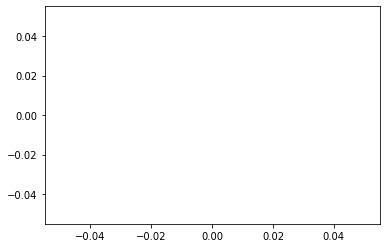

In [53]:
x,y = [],[]
for i in sort_with_x:
    if(i.cry==1):
        x.append(i.x)
        y.append(i.z)
plt.scatter(x,y,s=5)